#Data Science Lifecycle
---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [4]:
df=pd.read_csv('../data/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# 4. Exploratory Data Analysis


In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 381 rows and 13 columns


##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Total number of rows is 614, hence we have missing values in the following columns:
- Credit_History       
- Dependents           
- Gender               
- LoanAmount           
- Loan_Amount_Term             
- Married    
- Self_Employed        

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


We can see that Credit_History is actually not a numerical type, but categorical. Let's double check it's unique values.

We can then change the type of credit_history to object since it has 2 values (1,0)

In [8]:
np.sort(df.Credit_History.unique())

array([ 0.,  1., nan])

Loan_Amount_Term is a variable of numerical discrete data type

In [9]:
np.sort(df.Loan_Amount_Term.unique())

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan])

##### Using the function describe(include='o'), we can check the following  values for each categorical feature (column)


In [10]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


- This shows the count, unique and most frequent category per each column.
<br>
for example Gender total count=601, the most it has 2 unique value(F,M), the most frequent category is Male which takes 489 from the total count.

Let see the frequency for each categorical column with unique value > 2

In [11]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [12]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

for dependent column we have uncleaned value (3+) that need to be change to numerical 3 for furthure analysis

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/1026210113.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


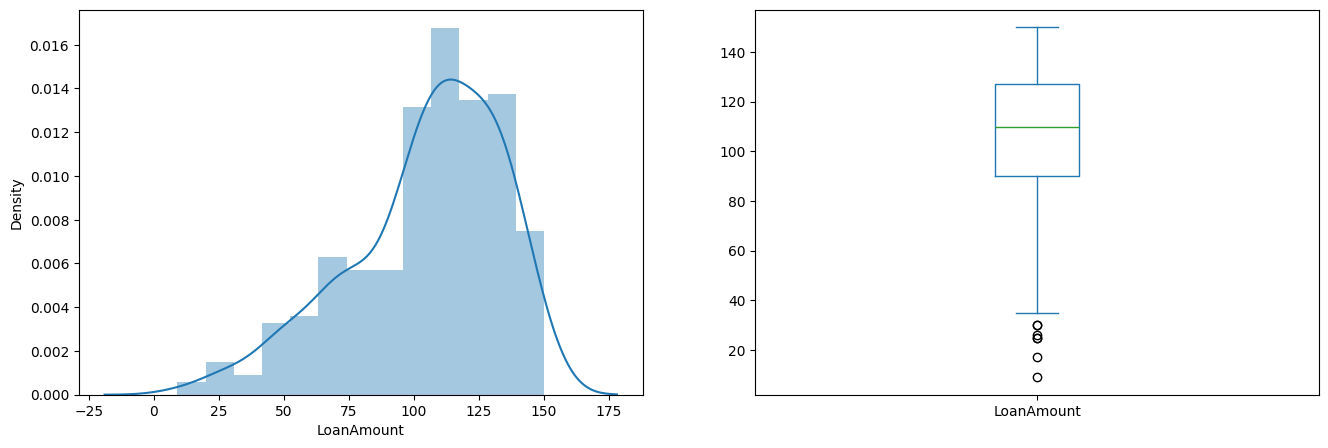

In [13]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/3124340750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['ApplicantIncome']);


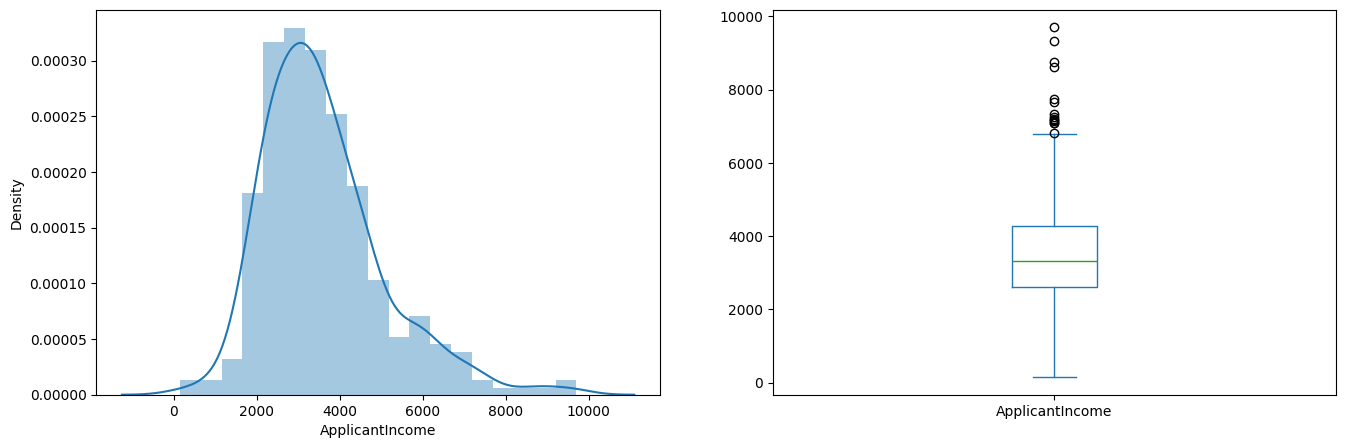

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/610815053.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['CoapplicantIncome']);


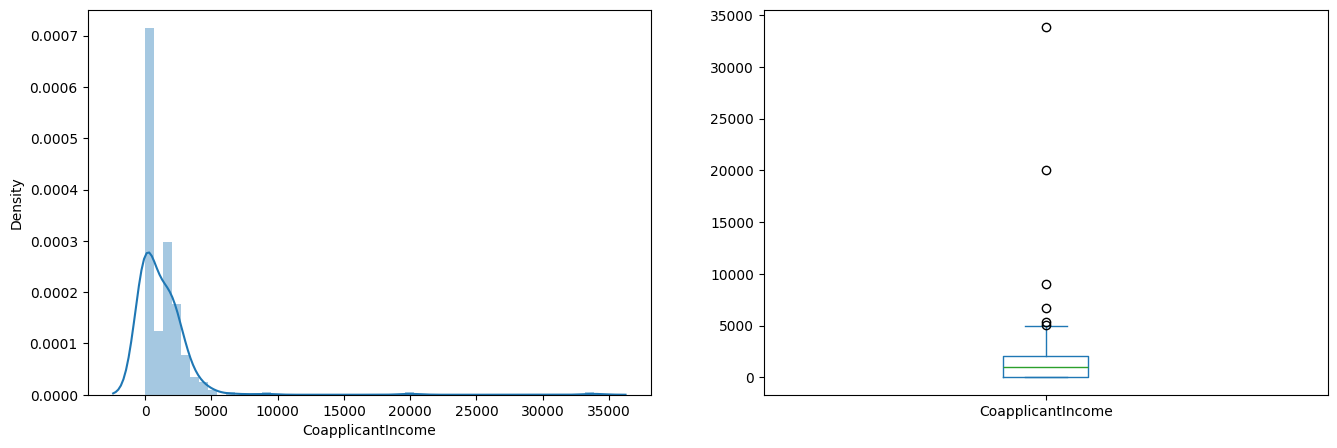

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

- outliers exist
- data is slightly right skewed

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/1352110232.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['Loan_Amount_Term']);


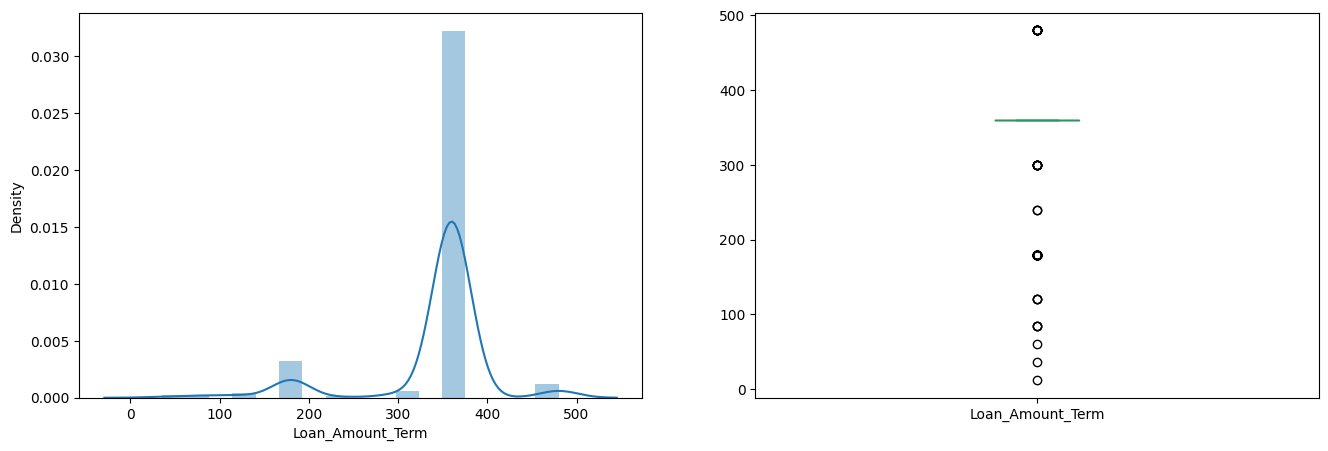

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(removeNA_df['Loan_Amount_Term']);

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

* Outliers Exist
* We can see that the Vast majority of the Loan_Amount_Terms are 360
* This is what we will show in the next plot.

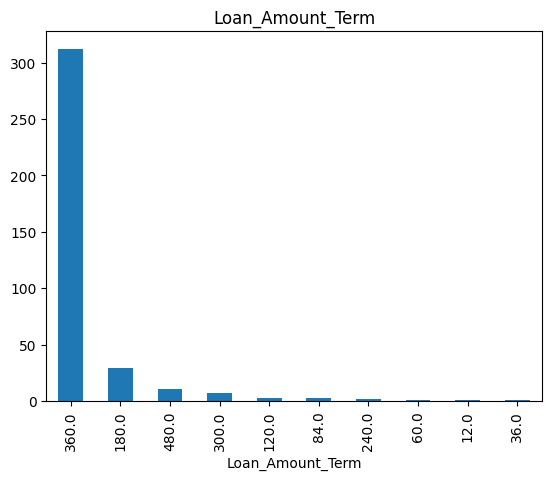

In [17]:
df['Loan_Amount_Term'].value_counts().plot.bar( title= 'Loan_Amount_Term')
plt.show()

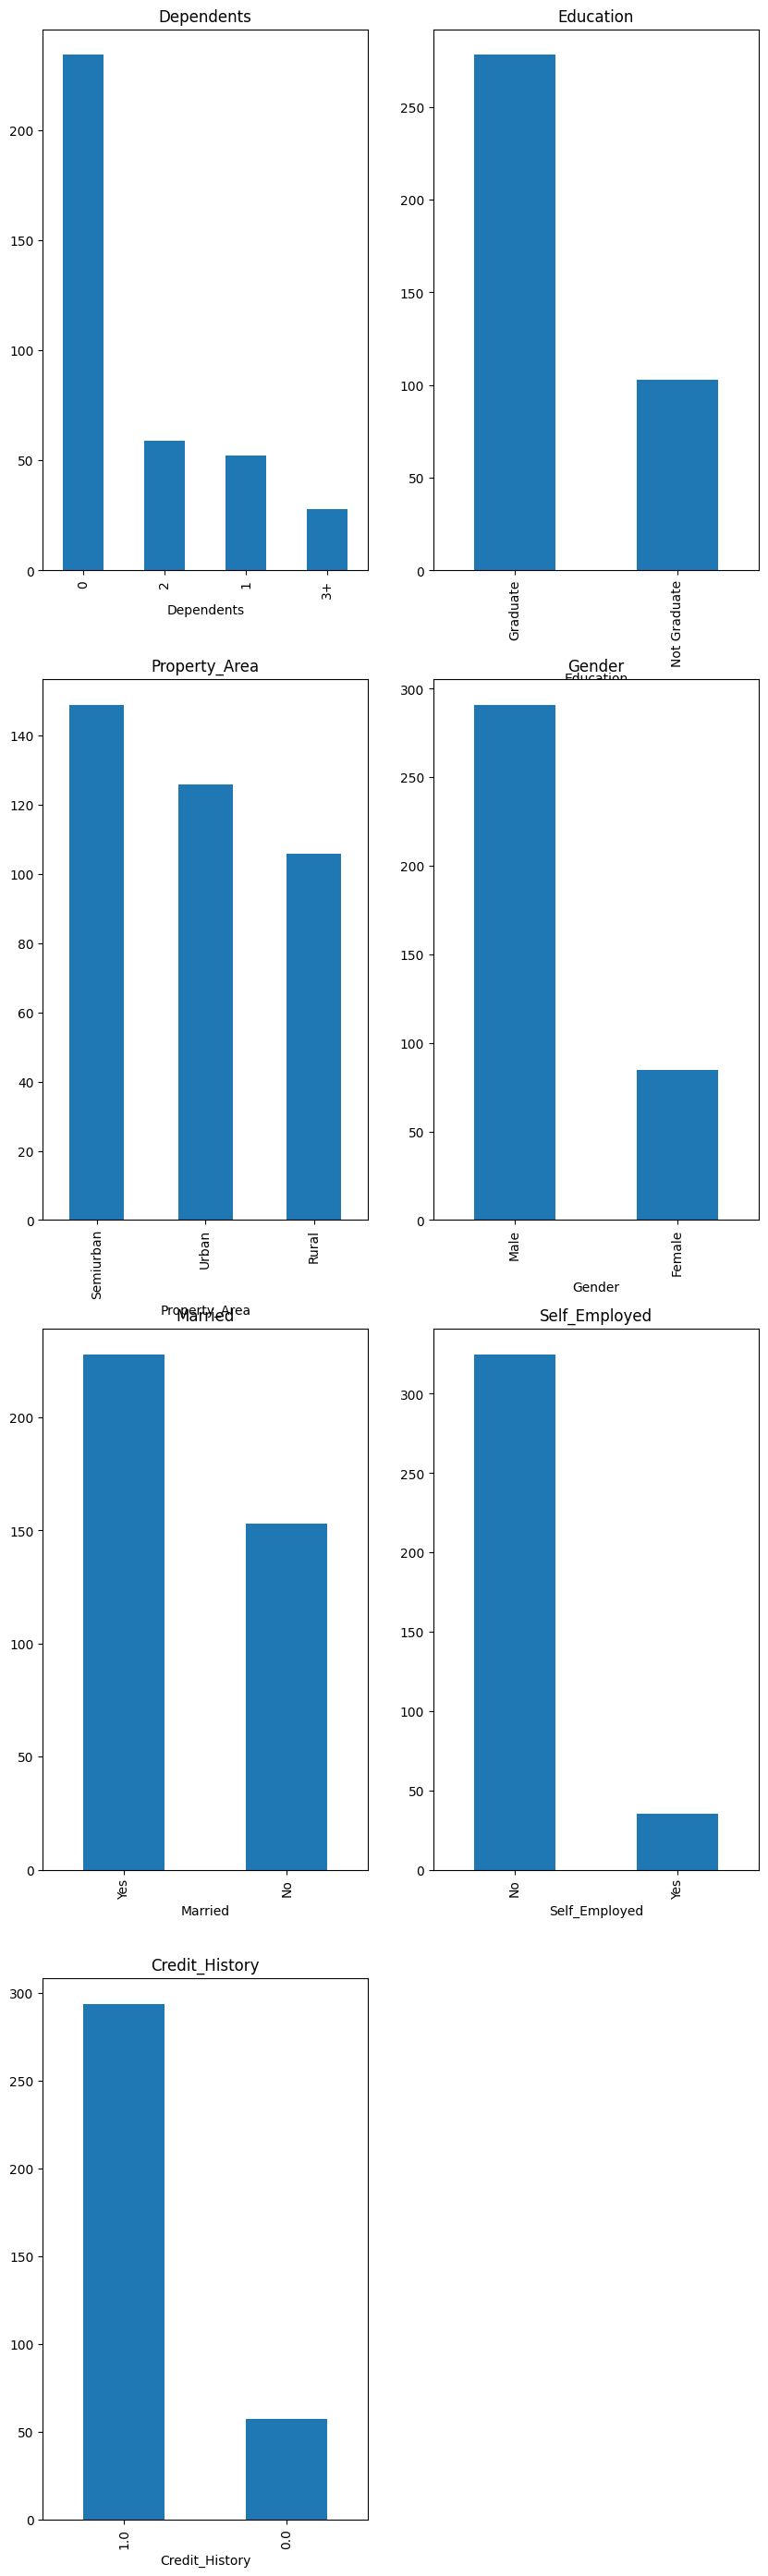

In [18]:
plt.figure(1)

plt.subplot(421)
df['Dependents'].value_counts().plot.bar(figsize=(10,35), title= 'Dependents')

plt.subplot(422)
df['Education'].value_counts().plot.bar(title= 'Education')

plt.subplot(423)
df['Property_Area'].value_counts().plot.bar(title= 'Property_Area')

plt.subplot(424)
df['Gender'].value_counts().plot.bar(title= 'Gender')

plt.subplot(425)
df['Married'].value_counts().plot.bar(title= 'Married')

plt.subplot(426)
df['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed')

plt.subplot(427)
df['Credit_History'].value_counts().plot.bar(title= 'Credit_History')

plt.show()

Loan_Status   N    Y
Gender              
Female       26   59
Male         80  211


<Axes: xlabel='Gender'>

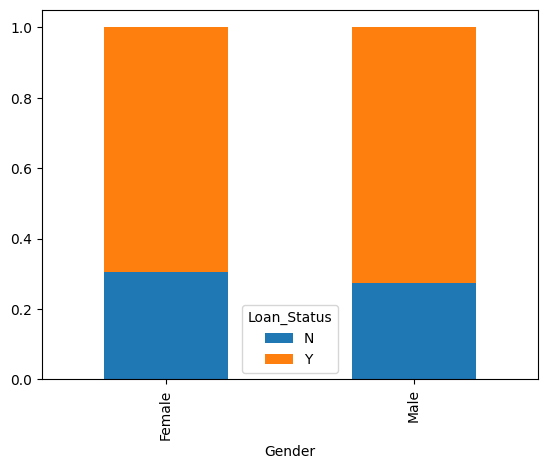

In [19]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
print(Gender)
#Gender.plot(kind='bar')
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Gender does not affect Loan_status. Slightly the same percentage of acceptance/rejection is for the 2 Genders.

Loan_Status      N    Y
Credit_History         
0.0             54    3
1.0             52  242


<Axes: xlabel='Credit_History'>

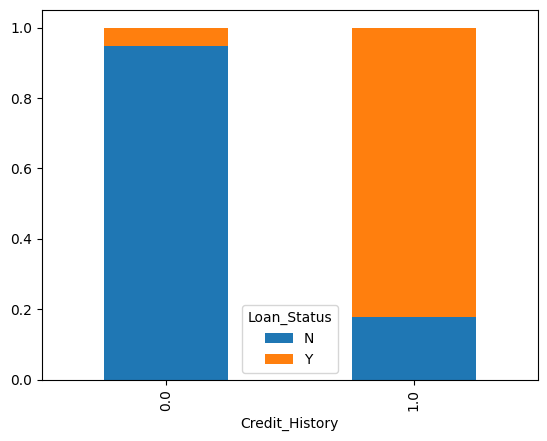

In [20]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(Credit_History)
#Credit_History.plot(kind='bar')
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Credit_History affects Loan_Status:
- most of people that have Credit_History=1 get a loan approval

Loan_Status   N    Y
Dependents          
0            66  168
1            17   35
2            15   44
3+            8   20


<Axes: xlabel='Dependents'>

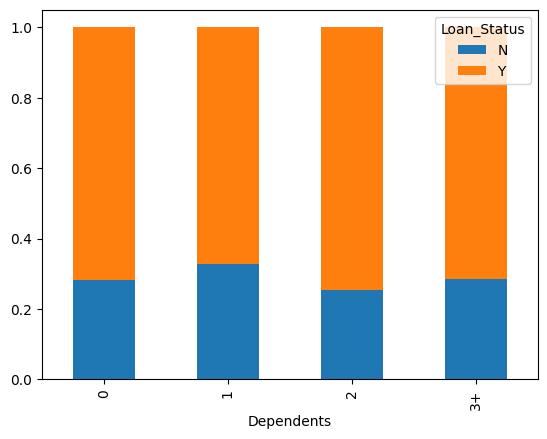

In [21]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
print(Dependents)
#Dependents.plot(kind='bar')
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Dependents might affect loan_status:
Accoridng to different numbers of dependents, we have some difference in percentages of accepted/rejected loans.

Loan_Status    N    Y
Education            
Graduate      76  202
Not Graduate  34   69


<Axes: xlabel='Education'>

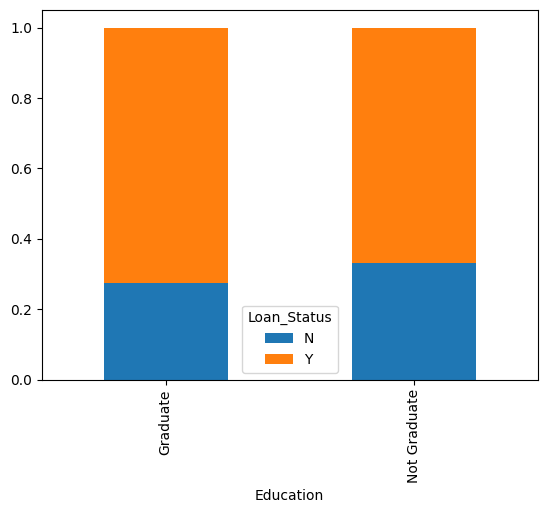

In [22]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
print(Education)
#Education.plot(kind='bar')
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Education affects loan_status:
- Graduate applicants have higher chance to get a loan accepted

Loan_Status   N    Y
Married             
No           52  101
Yes          58  170


<Axes: xlabel='Married'>

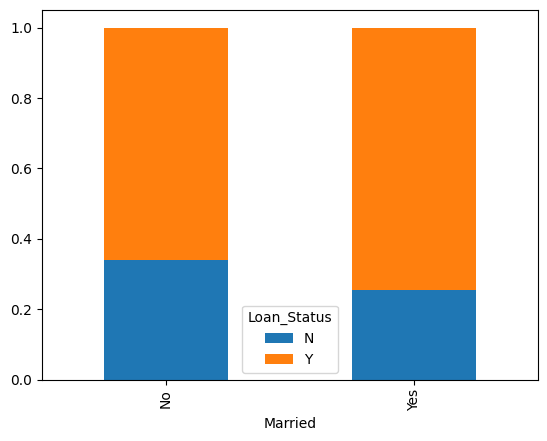

In [23]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
print(Married)
#Married.plot(kind='bar')
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Marriage affects loan_status:

- Married applicants have higher chance to get a loan accepted

Loan_Status     N    Y
Property_Area         
Rural          41   65
Semiurban      30  119
Urban          39   87


<Axes: xlabel='Property_Area'>

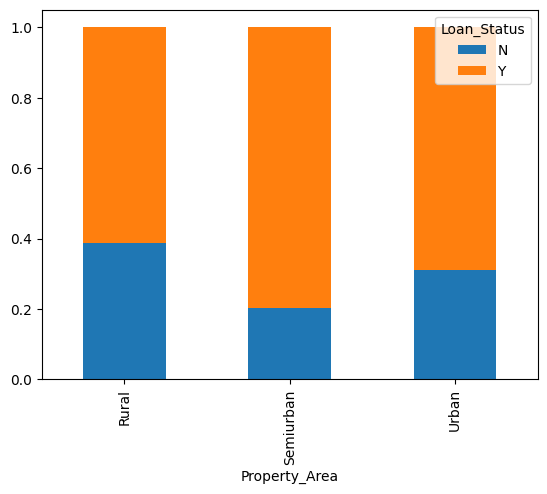

In [24]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
print(Property_Area)
#Property_Area.plot(kind='bar')
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Property_Area affects loan_status:

- Property_Area=Semiurban have higher chance to get a loan accepted

Loan_Status     N    Y
Self_Employed         
No             95  230
Yes            11   24


<Axes: xlabel='Self_Employed'>

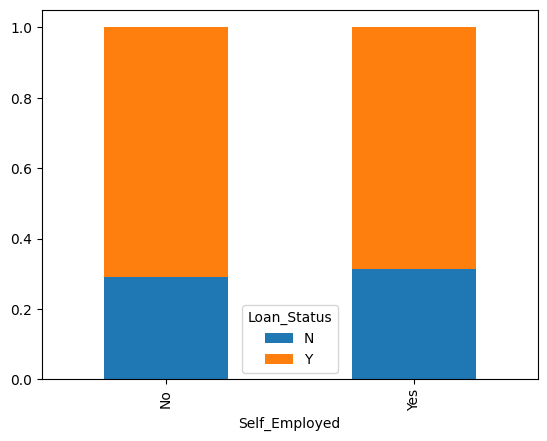

In [25]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(Self_Employed)
#Self_Employed.plot(kind='bar')
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Self_Employed does not affect the Loan status in this dataset. We have the same percentages of acceptance/rejection for Self employed and non self employed.

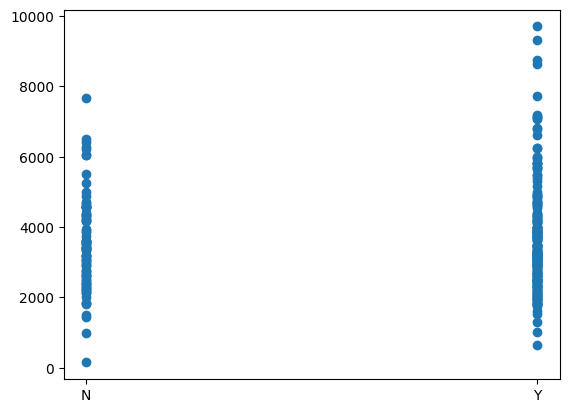

In [26]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['ApplicantIncome'] )

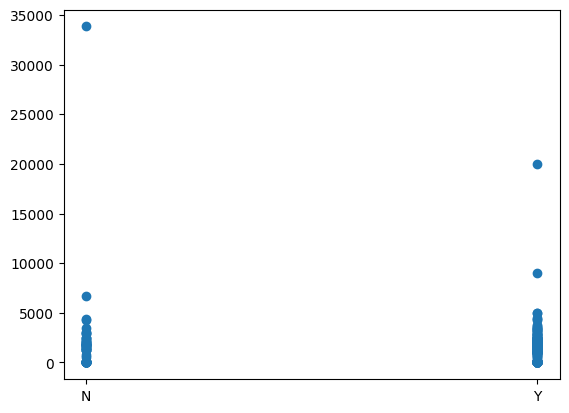

In [27]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['CoapplicantIncome'] )

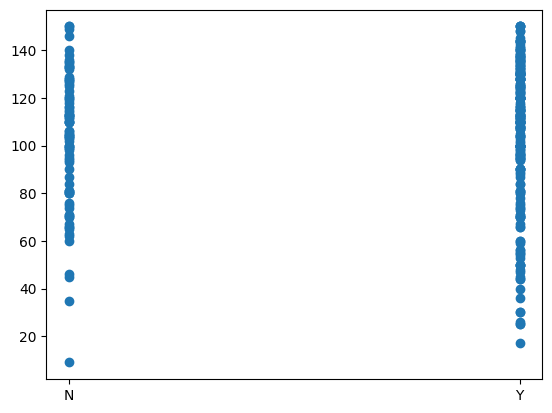

In [28]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['LoanAmount'] )

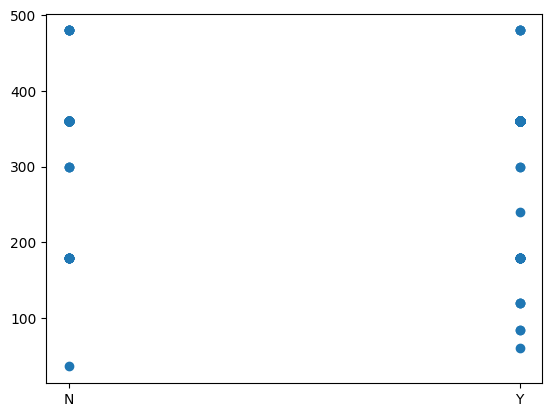

In [29]:
plt.scatter(removeNA_df['Loan_Status'], removeNA_df['Loan_Amount_Term'] )

We cannot tell wether a specific predicator can affect Loan_Status or not using scatter plot.
Better way to specify this is either by dividing the continous data to set of ranges and then use bar plot or by using median

In [45]:
df['Loan_Status'].median() # median because Not affected with outliers

1.0

- ApplicantIncome, LoanAmount, Loan_Amount_Term have same median for both loan_status class, thus these does not affect loan_status
- CoapplicantIncome has small median when loan_status= N, thus this affect loan_status
- We already saw that Credi_History affects the Loan_Status, but the reason that we have the same median is that this variable is treated as numerical variable rather than a categorical variable, and this is why, we will change it to categorical in the next steps.

# 5. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

In [31]:
df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

## Remove grabage data

In [46]:
df.Dependents=df.Dependents.replace({"3+": "3"})

##Convert continous data into categorical

In [47]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [48]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/3471180464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/3471180464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

## Check if any null value exist

In [49]:
df.isnull().sum().any()

False

## Encode categorical data

In [50]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0.333333,0.0,1.0,0.0,0.0
1,1.0,0.000000,0.0,1.0,1.0,1.0
2,1.0,0.000000,1.0,1.0,1.0,1.0
3,1.0,0.000000,0.0,0.0,1.0,1.0
4,1.0,0.000000,1.0,1.0,1.0,1.0


In [51]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/1188228603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/1188228603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
/var/folders/tt/h_8w1wws2r78nhcx6x1q8mn40000gn/T/ipykernel_82810/1188228603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,1,0,1,0,0
1,1,0,0,1,2,1
2,1,0,1,1,2,1
3,1,0,0,0,2,1
4,1,0,1,1,2,1


## Combine both cat_data and numerical_data

In [52]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,1,0,1,0,0,0.044567
1,1,0,0,1,2,1,0.000000
2,1,0,1,1,2,1,0.069687
3,1,0,0,0,2,1,0.000000
4,1,0,1,1,2,1,0.044803


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)

In [53]:
df_max = df.max() # get max per each column in dataset
df_max

Credit_History       1.0
Dependents           3.0
Education            1.0
Married              1.0
Property_Area        2.0
Loan_Status          1.0
CoapplicantIncome    1.0
dtype: float64

In [54]:
df = df.divide(df_max) # divide value for each column value by max
df.describe()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.850394,0.222222,0.270341,0.598425,0.526247,0.711286,0.037748
std,0.357154,0.329214,0.444720,0.490861,0.389796,0.453761,0.069179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.029051
75%,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,0.059580
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [55]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [56]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [57]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.7652173913043478

#7. Feature Importance

Here is how we can evaluate the feature importance in our problem.

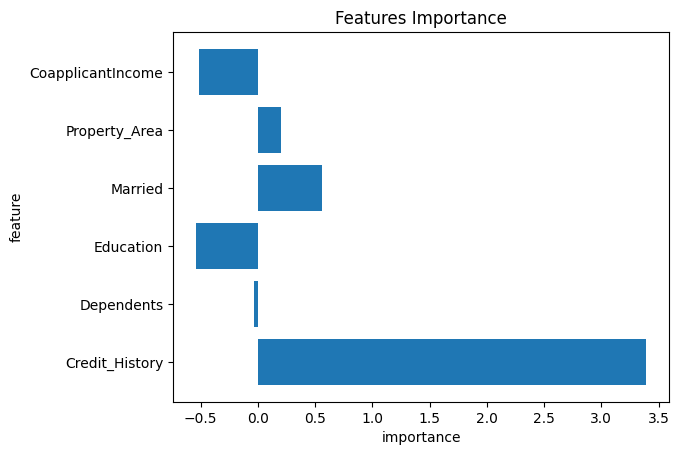

In [44]:
columns_names = x_train.columns.values
features_importance = model.coef_
f=features_importance.flatten()
plt.barh(columns_names, f)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

We see that the credit history is the most important feature to approve a loan.